In [19]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os
import requests 

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import re

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [20]:
careerTotPlayer = pd.read_csv('Data/CSV Files/Database/CareerTotPlayer.csv')
careerAVGPlayer = pd.read_csv('Data/CSV Files/Database/CareerAVGPlayerScrape.csv')
moreInfoPlayer = pd.read_csv('Data/CSV Files/Database/MoreInfoPerPlayer.csv')

In [21]:
# Loading the page
url = 'https://en.wikipedia.org/wiki/List_of_foreign_NBA_players'
response = requests.get(url)

randomPage = BeautifulSoup(response.content, "html.parser")
# randomPage = (str)(randomPage)

In [22]:
table = randomPage.find_all('table')[2]
# table = (str)(table)
table

<table class="wikitable sortable" style="font-size:95%">
<tbody><tr>
<th scope="col" width="125px">Nationality<sup class="reference" id="ref_Note1"><a href="#endnote_Note1">[A]</a></sup>
</th>
<th scope="col" width="125px">Birthplace<sup class="reference" id="ref_Note2"><a href="#endnote_Note2">[B]</a></sup>
</th>
<th scope="col" width="150px">Player
</th>
<th scope="col" width="25px">Pos.
</th>
<th scope="col" width="75px">Career<sup class="reference" id="ref_Note3"><a href="#endnote_Note3">[C]</a></sup>
</th>
<th scope="col" width="25px">Yrs
</th>
<th class="unsortable" scope="col">Notes
</th>
<th class="unsortable" scope="col">Ref.
</th></tr>
<tr>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/23px-Flag_of_Angola.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/35px-Flag_of_Angola.svg.

In [23]:
names = table.find_all('tr')[1:]
playerNames = []
for x in range(0,len(names)):
    playerNames.append(names[x].find_all('td')[2].text.strip())
playerNames

['Bruno Fernando*',
 'Julius Hodge',
 'Nicolás Brussino',
 'Carlos Delfino',
 'Patricio Garino',
 'Manu Ginóbili',
 'Walter Herrmann',
 'Nicolás Laprovíttola',
 'Andrés Nocioni',
 'Fabricio Oberto',
 'Pablo Prigioni',
 'Juan Ignacio Sánchez',
 'Luis Scola',
 'Rubén Wolkowyski',
 'Deng Adel*',
 'David Andersen',
 'Chris Anstey',
 'Cameron Bairstow',
 'Aron Baynes*',
 'Andrew Bogut',
 'Jonah Bolden*',
 'Mark Bradtke',
 'Ryan Broekhoff*',
 'Mitch Creek*',
 'Matthew Dellavedova*',
 'Dante Exum*',
 'Andrew Gaze',
 'Ricky Grace',
 'Shane Heal',
 'Isaac Humphries*',
 'Joe Ingles*',
 'Nathan Jawai',
 'Luc Longley',
 'Thon Maker*',
 'Mangok Mathiang',
 'Darnell Mee',
 'Patty Mills*',
 'Luke Schenscher',
 'Ben Simmons*',
 'Jakob Pöltl*',
 'Dexter Cambridge',
 'DeAndre Ayton*',
 'Buddy Hield*',
 'Ian Lockhart',
 'Mychal Thompson',
 'Maalik Wayns',
 'Didier Mbenga',
 'Noel Felix',
 'Marlon Garnett',
 'Milt Palacio',
 'J. R. Bremer',
 'Džanan Musa*',
 'Jusuf Nurkić*',
 'Aleksandar Radojević',
 'Mir

In [24]:
names = table.find_all('tr')[1:]
nation = []
for x in range(0,len(names)):
    nation.append(names[x].find_all('td')[0].text.strip())
nation

['Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahamas',
 'Bahamas',
 'Bahamas',
 'Bahamas',
 'Belarus',
 'Belgium',
 'Belize',
 'Belize',
 'Belize',
 'Bosnia and Herzegovina',
 'Bosnia and Herzegovina',
 'Bosnia and Herzegovina',
 'Bosnia and Herzegovina',
 'Bosnia and Herzegovina',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 '

In [25]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [26]:
similar('Luka Doncic', 'Luka Dončić')

0.8181818181818182

In [27]:
print(nation[18], playerNames[18])

Australia Aron Baynes*


In [28]:
noCollege = moreInfoPlayer
noCollege.head(1)

,ID,Player,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards
0,greenac01,A.C. Green,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0


In [29]:
noCollege['Nation'] = None
noCollege

,ID,Player,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Nation
0,greenac01,A.C. Green,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,None
1,bramlaj01,A.J. Bramlett,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,engliaj01,A.J. English,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,guytoaj01,A.J. Guyton,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4,hammoaj01,A.J. Hammons,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
5,priceaj01,A.J. Price,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
6,wyndeaj01,A.J. Wynder,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
7,brookaa01,Aaron Brooks,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None
8,gordoaa01,Aaron Gordon,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
9,grayaa01,Aaron Gray,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [30]:
noCollege = noCollege[noCollege['From'] != 0]
noCollege

,ID,Player,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Nation
0,greenac01,A.C. Green,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,None
1,bramlaj01,A.J. Bramlett,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,engliaj01,A.J. English,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,guytoaj01,A.J. Guyton,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4,hammoaj01,A.J. Hammons,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
5,priceaj01,A.J. Price,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
6,wyndeaj01,A.J. Wynder,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
7,brookaa01,Aaron Brooks,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None
8,gordoaa01,Aaron Gordon,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
9,grayaa01,Aaron Gray,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [31]:
for x in range(0, len(noCollege)):
    y = 0
    flag = -1
    currName = noCollege['Player'].values[x]
#     print(currName)
    while (y < len(playerNames) and flag != 0):
#         print(y)
        if (similar(currName, playerNames[y]) >= 0.8):
            noCollege['Nation'].values[x] = nation[y]
            flag = 0
#             print(nation[y])
        y += 1
# noCollege = noCollege[noCollege['Colleges'] != 'None']
noCollege = noCollege[noCollege['Nation'] != None]
noCollege

,ID,Player,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Nation
0,greenac01,A.C. Green,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,None
1,bramlaj01,A.J. Bramlett,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,engliaj01,A.J. English,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,guytoaj01,A.J. Guyton,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4,hammoaj01,A.J. Hammons,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
5,priceaj01,A.J. Price,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
6,wyndeaj01,A.J. Wynder,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
7,brookaa01,Aaron Brooks,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None
8,gordoaa01,Aaron Gordon,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
9,grayaa01,Aaron Gray,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [32]:
noCollege.Nation = noCollege.Nation.astype(str)
noCollege = noCollege[noCollege['Nation'] != 'None']
noCollege = noCollege[noCollege['Colleges'] == 'None']
noCollege

,ID,Player,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Nation
47,djordal01,Aleksandar Djordjevic,1997.0,1997.0,187.96,198.0,"August 26, 1967",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Serbia
49,abrinal01,Alex Abrines,2017.0,2019.0,198.12,200.0,"August 1, 1993",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spain
54,garcial01,Alex Garcia,2004.0,2005.0,190.50,220.0,"March 4, 1980",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil
62,volkoal01,Alexander Volkov,1990.0,1992.0,208.28,218.0,"March 28, 1964",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ukraine
63,shvedal01,Alexey Shved,2013.0,2015.0,198.12,190.0,"December 16, 1988",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Russia
64,ajincal01,Alexis Ajinca,2009.0,2017.0,218.44,248.0,"May 6, 1988",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,France
86,johnsam01,Amir Johnson,2006.0,2019.0,205.74,240.0,"May 1, 1987",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States
87,varejan01,Anderson Varejao,2005.0,2017.0,208.28,273.0,"September 28, 1982",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,Brazil
89,blatcan01,Andray Blatche,2006.0,2014.0,210.82,235.0,"August 22, 1986",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philippines
103,bargnan01,Andrea Bargnani,2007.0,2016.0,213.36,245.0,"October 26, 1985",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy


In [33]:
noCollege = noCollege[noCollege['Nation'] != 'United States']
noCollege

,ID,Player,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Nation
47,djordal01,Aleksandar Djordjevic,1997.0,1997.0,187.96,198.0,"August 26, 1967",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Serbia
49,abrinal01,Alex Abrines,2017.0,2019.0,198.12,200.0,"August 1, 1993",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spain
54,garcial01,Alex Garcia,2004.0,2005.0,190.50,220.0,"March 4, 1980",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil
62,volkoal01,Alexander Volkov,1990.0,1992.0,208.28,218.0,"March 28, 1964",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ukraine
63,shvedal01,Alexey Shved,2013.0,2015.0,198.12,190.0,"December 16, 1988",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Russia
64,ajincal01,Alexis Ajinca,2009.0,2017.0,218.44,248.0,"May 6, 1988",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,France
87,varejan01,Anderson Varejao,2005.0,2017.0,208.28,273.0,"September 28, 1982",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,Brazil
89,blatcan01,Andray Blatche,2006.0,2014.0,210.82,235.0,"August 22, 1986",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philippines
103,bargnan01,Andrea Bargnani,2007.0,2016.0,213.36,245.0,"October 26, 1985",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy
104,glynian01,Andreas Glyniadakis,2007.0,2007.0,215.90,280.0,"August 21, 1981",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Greece


In [34]:
# del careerAVGPlayer['Player']
outsideUSDF = pd.merge(noCollege, careerAVGPlayer, on='ID', how='inner')
outsideUSDF

,ID,Player_x,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,djordal01,Aleksandar Djordjevic,1997.0,1997.0,187.96,198.0,"August 26, 1967",None,0.0,0.0,...,0.125,0.500,0.625,0.625,0.000,0.000,0.625,0.375,3.125,2.250
1,abrinal01,Alex Abrines,2017.0,2019.0,198.12,200.0,"August 1, 1993",None,0.0,0.0,...,0.292,1.184,1.476,0.508,0.524,0.130,0.395,1.676,5.254,2.984
2,garcial01,Alex Garcia,2004.0,2005.0,190.50,220.0,"March 4, 1980",None,0.0,0.0,...,0.700,0.800,1.500,1.800,0.600,0.100,0.900,1.500,4.700,2.100
3,volkoal01,Alexander Volkov,1990.0,1992.0,208.28,218.0,"March 28, 1964",None,0.0,0.0,...,1.040,1.537,2.577,2.235,0.685,0.349,1.034,2.309,6.839,5.396
4,shvedal01,Alexey Shved,2013.0,2015.0,198.12,190.0,"December 16, 1988",None,0.0,0.0,...,0.467,1.484,1.951,2.527,0.604,0.269,1.335,1.104,7.412,5.626
5,ajincal01,Alexis Ajinca,2009.0,2017.0,218.44,248.0,"May 6, 1988",None,0.0,0.0,...,1.169,2.720,3.889,0.486,0.348,0.611,0.841,2.240,5.274,5.155
6,varejan01,Anderson Varejao,2005.0,2017.0,208.28,273.0,"September 28, 1982",None,0.0,0.0,...,2.326,4.579,6.905,1.098,0.848,0.624,0.917,2.611,6.994,9.404
7,blatcan01,Andray Blatche,2006.0,2014.0,210.82,235.0,"August 22, 1986",None,0.0,0.0,...,1.841,3.481,5.321,1.374,0.849,0.794,1.582,2.428,9.959,9.000
8,bargnan01,Andrea Bargnani,2007.0,2016.0,213.36,245.0,"October 26, 1985",None,0.0,0.0,...,0.952,3.633,4.585,1.178,0.385,0.848,1.533,2.440,14.209,9.936
9,glynian01,Andreas Glyniadakis,2007.0,2007.0,215.90,280.0,"August 21, 1981",None,0.0,0.0,...,0.154,0.462,0.615,0.077,0.000,0.000,0.692,1.462,1.308,-0.923


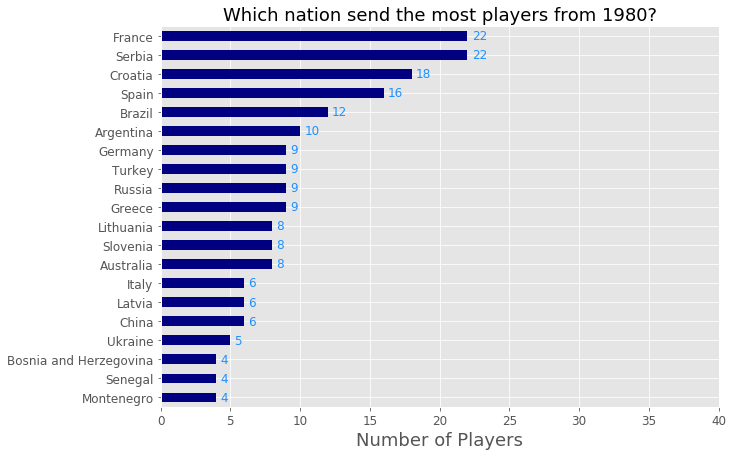

In [35]:
outsideUS = (outsideUSDF['Nation'].value_counts())
outsideUS = outsideUS.iloc[0:]
outsideUS = pd.DataFrame(outsideUS)

top20 = outsideUS.head(20)
ax = top20.plot(kind='barh', figsize=(10,7), color="navy", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Which nation send the most players from 1980?", fontsize=18)
ax.set_xlabel("Number of Players", fontsize=18);
# ax.set_xticks([20, 25 ,30, 35, 40, 45, 50, 55, 60, 70])
ax.set_xlim([0,40])

# create a list to collect the plt.patches data
totals = []

# # find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# # set individual bar lables using above list
total = sum(totals)

# # set individual bar lables using above list
for i in ax.patches:
# #     # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() +.3, i.get_y() +.43,i.get_width(),color='dodgerblue',  fontsize=12)

# invert for largest on top 
ax.invert_yaxis()

In [36]:
nationList = outsideUS.index
nationList

Index(['France', 'Serbia', 'Croatia', 'Spain', 'Brazil', 'Argentina',
       'Germany', 'Turkey', 'Russia', 'Greece', 'Lithuania', 'Slovenia',
       'Australia', 'Italy', 'Latvia', 'China', 'Ukraine',
       'Bosnia and Herzegovina', 'Senegal', 'Montenegro', 'Georgia',
       'Democratic Republic of the Congo', 'Poland', 'Cuba', 'Switzerland',
       'Great Britain England', 'Czech Republic', 'Mali', 'South Korea',
       'Sweden', 'Uruguay', 'Bulgaria', 'Iran', 'Nigeria', 'Mexico',
       'Puerto Rico', 'North Macedonia', 'Tunisia', 'Israel', 'Romania',
       'Philippines', 'Venezuela', 'Estonia', 'Hungary'],
      dtype='object')

In [37]:
prizedPlayers = outsideUSDF.iloc[:,:25]
prizedPlayers['Total'] = prizedPlayers['MVP'] + prizedPlayers['Finals MVP'] + prizedPlayers['All-Star MVP'] + prizedPlayers['Most Improved'] + prizedPlayers['Sixth Man'] + prizedPlayers['Defence Player']+ prizedPlayers['Rookie'] + prizedPlayers['All Tot'] + prizedPlayers['All-Star'] + prizedPlayers['D Tot']
prizedPlayers = prizedPlayers[prizedPlayers['Total'] > 0]
prizedPlayers

,ID,Player_x,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Nation,Total
6,varejan01,Anderson Varejao,2005.0,2017.0,208.28,273.0,"September 28, 1982",None,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,Brazil,1.0
10,kirilan01,Andrei Kirilenko,2002.0,2015.0,205.74,220.0,"February 18, 1981",None,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.0,4.0,Russia,4.0
25,diawbo01,Boris Diaw,2004.0,2017.0,203.20,250.0,"April 16, 1982",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,France,1.0
51,nowitdi01,Dirk Nowitzki,1999.0,2019.0,213.36,245.0,"June 19, 1978",None,1.0,1.0,...,5.0,3.0,12.0,14.0,0.0,0.0,0.0,28.0,Germany,28.0
55,petrodr01,Drazen Petrovic,1990.0,1993.0,195.58,195.0,"October 22, 1964",None,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Croatia,1.0
71,muresgh01,Gheorghe Muresan,1994.0,2000.0,231.14,303.0,"February 14, 1971",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Romania,1.0
72,antetgi01,Giannis Antetokounmpo,2014.0,2019.0,210.82,242.0,"December 6, 1994",None,0.0,0.0,...,2.0,0.0,3.0,3.0,2.0,1.0,1.0,10.0,Greece,10.0
73,dragigo01,Goran Dragic,2009.0,2019.0,190.50,190.0,"May 6, 1986",None,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,Slovenia,3.0
80,turkohe01,Hedo Turkoglu,2001.0,2015.0,208.28,220.0,"March 19, 1979",None,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Turkey,1.0
105,porzikr01,Kristaps Porzingis,2016.0,2018.0,220.98,240.0,"August 2, 1995",None,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Latvia,1.0


In [38]:
nationStats = []
nationSuccess = pd.DataFrame()
nationSuccessCol = ['Nation', 'All-NBA', 'Defence Team', 'All-Star', 'Defence Player', 'Sixth Man', 'MVP', 'Finals MVP', 'Most Improved', 'Rookie', 'Total Prized Players']
for c in range(0, len(nationList)):
    nationStats = []
    tot = 0
    currNation = outsideUSDF[outsideUSDF.Nation == nationList[c]]
#     Nation Name
    nationStats.append(nationList[c])
#     Precent of All-Star
    currAllStar = currNation[currNation['All Tot'] > 0].shape[0]
    nationStats.append(currAllStar)
    currDefenceTeam = currNation[currNation['D Tot'] > 0].shape[0]
    nationStats.append(currDefenceTeam)
    for i in range(3, len(nationSuccessCol) - 1):
#     Precent of All-NBA Team
        currStats = currNation[currNation[nationSuccessCol[i]] > 0].shape[0]
        nationStats.append(currStats)
    tot = (prizedPlayers[prizedPlayers['Nation'] == nationList[c]]).shape[0]
    nationStats.append(tot)
    nationStats = pd.DataFrame(nationStats)
    nationStats = pd.DataFrame(nationStats.transpose())
    nationStats.columns = nationSuccessCol
    nationSuccess = pd.concat([nationSuccess, nationStats])
# collegeSuccess['Tot'] = collegeSuccess['All Star'] + collegeSuccess['All-NBA'] + collegeSuccess['Defence']
nationSuccess = nationSuccess.sort_values('Nation', ascending=True)
# collegeSuccess.set_index("College", inplace = True) 
nationSuccess

,Nation,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Total Prized Players
0,Argentina,1,0,1,0,1,0,0,0,0,1
0,Australia,0,0,0,0,0,0,0,0,0,0
0,Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,0
0,Brazil,0,1,0,0,1,0,0,0,0,2
0,Bulgaria,0,0,0,0,0,0,0,0,0,0
0,China,1,0,1,0,0,0,0,0,0,1
0,Croatia,1,0,0,0,1,0,0,0,0,2
0,Cuba,0,0,0,0,0,0,0,0,0,0
0,Czech Republic,0,0,0,0,0,0,0,0,0,0
0,Democratic Republic of the Congo,0,0,0,0,0,0,0,0,0,0


In [39]:
nationStats2 = []
nationSuccess2 = pd.DataFrame()
nationSuccessCol = ['Nation', 'All-NBA', 'Defence Team', 'All-Star', 'Defence Player', 'Sixth Man', 'MVP', 'Finals MVP', 'Most Improved', 'Rookie']
for c in range(0, len(nationList)):
    nationStats2 = []
    tot = 0
    currNation = outsideUSDF[outsideUSDF.Nation == nationList[c]]
#     Nation Name
    nationStats2.append(nationList[c])
#     Precent of All-Star
    currAllStar = currNation['All Tot'].sum()
    nationStats2.append(currAllStar)
    currDefenceTeam = currNation['D Tot'].sum()
    nationStats2.append(currDefenceTeam)
    for i in range(3, len(nationSuccessCol)):
#     Precent of All-NBA Team
        currStats = currNation[nationSuccessCol[i]].sum()
        nationStats2.append(currStats)
    nationStats2 = pd.DataFrame(nationStats2)
    nationStats2 = pd.DataFrame(nationStats2.transpose())
    nationStats2.columns = nationSuccessCol
    nationSuccess2 = pd.concat([nationSuccess2, nationStats2])
nationSuccess2['Tot'] = nationSuccess2['All-NBA'] + nationSuccess2['Defence Team'] + nationSuccess2['All-Star'] + nationSuccess2['Defence Player'] + nationSuccess2['Sixth Man'] + nationSuccess2['MVP'] + nationSuccess2['Finals MVP'] + nationSuccess2['Most Improved'] + nationSuccess2['Rookie']
nationSuccess2 = nationSuccess2.sort_values('Nation', ascending=True)
# collegeSuccess.set_index("College", inplace = True) 
nationSuccess2

,Nation,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Tot
0,Argentina,2,0,2,0,1,0,0,0,0,5
0,Australia,0,0,0,0,0,0,0,0,0,0
0,Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,0
0,Brazil,0,1,0,0,1,0,0,0,0,2
0,Bulgaria,0,0,0,0,0,0,0,0,0,0
0,China,5,0,8,0,0,0,0,0,0,13
0,Croatia,1,0,0,0,1,0,0,0,0,2
0,Cuba,0,0,0,0,0,0,0,0,0,0
0,Czech Republic,0,0,0,0,0,0,0,0,0,0
0,Democratic Republic of the Congo,0,0,0,0,0,0,0,0,0,0


In [40]:
outsideUSDFCopy = nationSuccess[['Nation', 'Total Prized Players']]
outsideUSDF1Copy = nationSuccess2[['Nation', 'Tot']]

In [41]:
outsideUSDFCopy = pd.merge(outsideUSDFCopy, outsideUSDF1Copy, on = 'Nation', how='inner')

In [42]:
outsideUSDFCopy = outsideUSDFCopy.sort_values('Tot', ascending=False)
outsideUSDFCopy

,Nation,Total Prized Players,Tot
13,Germany,1,28
36,Spain,3,21
11,France,3,18
5,China,1,13
15,Greece,1,10
33,Serbia,3,7
0,Argentina,1,5
31,Russia,1,4
34,Slovenia,1,3
3,Brazil,2,2


In [43]:
numOfEU = outsideUSDF.shape[0]
numOfEU

230

In [44]:
numOfPLR = careerAVGPlayer.shape[0]
numOfPLR

3088

In [45]:
prizedPlayers.shape[0]

25

In [46]:
outsideUSDFCopy.Tot.sum()

120.0

In [48]:
outsideUSDF['Colleges'] = outsideUSDF['Nation']
outsideUSDF

,ID,Player_x,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,djordal01,Aleksandar Djordjevic,1997.0,1997.0,187.96,198.0,"August 26, 1967",Serbia,0.0,0.0,...,0.125,0.500,0.625,0.625,0.000,0.000,0.625,0.375,3.125,2.250
1,abrinal01,Alex Abrines,2017.0,2019.0,198.12,200.0,"August 1, 1993",Spain,0.0,0.0,...,0.292,1.184,1.476,0.508,0.524,0.130,0.395,1.676,5.254,2.984
2,garcial01,Alex Garcia,2004.0,2005.0,190.50,220.0,"March 4, 1980",Brazil,0.0,0.0,...,0.700,0.800,1.500,1.800,0.600,0.100,0.900,1.500,4.700,2.100
3,volkoal01,Alexander Volkov,1990.0,1992.0,208.28,218.0,"March 28, 1964",Ukraine,0.0,0.0,...,1.040,1.537,2.577,2.235,0.685,0.349,1.034,2.309,6.839,5.396
4,shvedal01,Alexey Shved,2013.0,2015.0,198.12,190.0,"December 16, 1988",Russia,0.0,0.0,...,0.467,1.484,1.951,2.527,0.604,0.269,1.335,1.104,7.412,5.626
5,ajincal01,Alexis Ajinca,2009.0,2017.0,218.44,248.0,"May 6, 1988",France,0.0,0.0,...,1.169,2.720,3.889,0.486,0.348,0.611,0.841,2.240,5.274,5.155
6,varejan01,Anderson Varejao,2005.0,2017.0,208.28,273.0,"September 28, 1982",Brazil,0.0,0.0,...,2.326,4.579,6.905,1.098,0.848,0.624,0.917,2.611,6.994,9.404
7,blatcan01,Andray Blatche,2006.0,2014.0,210.82,235.0,"August 22, 1986",Philippines,0.0,0.0,...,1.841,3.481,5.321,1.374,0.849,0.794,1.582,2.428,9.959,9.000
8,bargnan01,Andrea Bargnani,2007.0,2016.0,213.36,245.0,"October 26, 1985",Italy,0.0,0.0,...,0.952,3.633,4.585,1.178,0.385,0.848,1.533,2.440,14.209,9.936
9,glynian01,Andreas Glyniadakis,2007.0,2007.0,215.90,280.0,"August 21, 1981",Greece,0.0,0.0,...,0.154,0.462,0.615,0.077,0.000,0.000,0.692,1.462,1.308,-0.923


In [49]:
outsideUSDF.to_csv('Data/CSV Files/Database/outsideUSDF.csv', index=False)